In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip '/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes.zip' -d '/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data'

# #4m 58s

#(0) Import Libraries

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
print(torch.__version__)

import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from PIL import Image

2.0.0+cu118


##Loading Data

In [ ]:
train = pd.read_json("/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/train.jsonl", lines=True)
val = pd.read_json("/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/dev_seen.jsonl", lines=True)
test = pd.read_json("/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/test_seen.jsonl", lines=True)

In [ ]:
train

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [ ]:
train["label"].value_counts()

0    5481
1    3019
Name: label, dtype: int64

##Dropping bad rows in train, val & test

In [ ]:
# import os
not_opening=[]
r='/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/'
for i in range(len(train)):
    isExist = os.path.exists(r+train["img"][i])
    if (isExist == False):
      not_opening.append(i)

print(not_opening)
print(len(not_opening))

train.drop( not_opening, axis=0, inplace=True)
train.reset_index(inplace=True)
train.drop(['index'], axis=1, inplace=True)
train

[616, 771, 973, 1408, 1695, 2146, 2302, 2553, 2905, 3133, 3359, 3453, 3546, 3934, 4029, 4095, 4376, 5206, 5223, 5275, 5392, 5881, 6074, 6174, 6489, 6579, 6780, 6862, 7060, 7233, 7241, 7311, 7773, 7923, 8041, 8429, 8460]
37


,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8458,10423,img/10423.png,1,nobody wants to hang auschwitz me
8459,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8460,36947,img/36947.png,1,gays on social media: equality! body positivit...
8461,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [ ]:
# import os
not_opening=[]
r='/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/'
for i in range(len(val)):
    isExist = os.path.exists(r+val["img"][i])
    if (isExist == False):
      not_opening.append(i)

print(not_opening)
print(len(not_opening))

val.drop(not_opening, axis=0, inplace=True)
val.reset_index(inplace=True)
val.drop(['index'], axis=1, inplace=True)
val

[]
0


,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...
498,9863,img/09863.png,0,diverse group of women


In [ ]:
# import os
not_opening=[]
r='/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/'
for i in range(len(test)):
    isExist = os.path.exists(r+test["img"][i])
    if (isExist == False):
      not_opening.append(i)

print(not_opening)
print(len(not_opening))

test.drop(not_opening, axis=0, inplace=True)
test.reset_index(inplace=True)
test.drop(['index'], axis=1, inplace=True)
test

[694, 994]
2


,id,img,label,text
0,16395,img/16395.png,1,handjobs sold seperately
1,37405,img/37405.png,1,introducing fidget spinner for women
2,94180,img/94180.png,1,happy pride month let's go beat up lesbians
3,54321,img/54321.png,1,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,1,finds out those 72 virgins.. are goats
...,...,...,...,...
993,3869,img/03869.png,0,a mother's love for the child is a divine thing
994,23817,img/23817.png,0,sea monkeys
995,56280,img/56280.png,0,little miss muffet sat on her tuffet
996,29384,img/29384.png,0,they're in a row


In [ ]:
os.path.exists('/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img/59716.png')

False

In [ ]:
#train data
train_data_refined=train.drop(['id','text'],axis=1)
# display(train_data_refined)

for i in train_data_refined.index:
  train_data_refined["img"][i]=train_data_refined["img"][i][-9:]

train_data_refined

<ipython-input-11-47d7d1c7876b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_refined["img"][i]=train_data_refined["img"][i][-9:]


,img,label
0,42953.png,0
1,23058.png,0
2,13894.png,0
3,37408.png,0
4,82403.png,0
...,...,...
8458,10423.png,1
8459,98203.png,1
8460,36947.png,1
8461,16492.png,1


In [ ]:
train_data_refined.isnull().sum()

img      0
label    0
dtype: int64

In [ ]:
#test data
test_data_refined=test.drop(['id','text'],axis=1)
# display(test_data_refined)

for i in test_data_refined.index:
  test_data_refined["img"][i]=test_data_refined["img"][i][-9:]

test_data_refined

<ipython-input-13-28903c867cb3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_refined["img"][i]=test_data_refined["img"][i][-9:]


,img,label
0,16395.png,1
1,37405.png,1
2,94180.png,1
3,54321.png,1
4,97015.png,1
...,...,...
993,03869.png,0
994,23817.png,0
995,56280.png,0
996,29384.png,0


In [ ]:
val_data_refined=val.drop(['id','text'],axis=1)
# display(val_data_refined)

for i in val_data_refined.index:
  val_data_refined["img"][i]=val_data_refined["img"][i][-9:]

val_data_refined

<ipython-input-14-c2d832eb4882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data_refined["img"][i]=val_data_refined["img"][i][-9:]


,img,label
0,08291.png,1
1,46971.png,1
2,03745.png,1
3,83745.png,1
4,80243.png,1
...,...,...
495,83675.png,0
496,37198.png,0
497,48670.png,0
498,09863.png,0


In [ ]:
# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

# # Hyperparameters
# in_channel = 3
# num_classes = 2
# learning_rate = 3e-4
# num_epochs = 10

cuda


In [ ]:
from torch.utils.data import Dataset
from skimage import io

class customDataset(Dataset):
  def __init__(self, dataframe, root_dir, transform=None):
      self.annotations = dataframe
      self.root_dir = root_dir
      self.transform = transform


  def __len__(self):
      return len(self.annotations)

  def __getitem__(self, index):
      img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
      # image = io.imread(img_path)
      image = Image.open(img_path).convert('RGB')
      y_label = torch.tensor(int(self.annotations.iloc[index,1]))

      if self.transform:
        image=self.transform(image)
      return (image, y_label)


In [ ]:
import torchvision.transforms as transforms

train_dataset0 = customDataset(
    dataframe=train_data_refined,
    root_dir = "/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img",

    )

test_dataset = customDataset(
    dataframe=test_data_refined,
    root_dir = "/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img",

    )

val_dataset = customDataset(
    dataframe=val_data_refined,
    root_dir = "/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img",

    )


In [ ]:
train_size = int(0.4 * len(train_dataset0))
test_size = len(train_dataset0) - train_size
train_dataset, test_dataset0 = torch.utils.data.random_split(train_dataset0, [train_size, test_size])

In [ ]:
len(train_dataset)

3385

##Pre-process Images

In [ ]:
#Class for tranforming the images
class transform_dataset():

    def __init__(self, data, transform):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx][0]
        item_label=self.data[idx][1]
        item = self.transform(item)
        return item,item_label

##Random Rotation + Color Jittering + Resize (224)

In [ ]:
#TRAIN : Defining the transformation function
transform_function_train = transforms.Compose([
    # transforms.ToTensor(),
    # transforms.ToPILImage(),
    transforms.RandomRotation(degrees=(-2,2)),
    # transforms.ColorJitter(brightness=0.5, contrast=0.2, saturation=0.4, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),
    transforms.Resize([64, 64]),

  ])

##**Normalise + Resize for Validation & Test data**

In [ ]:
#VAL + TEST : Defining the transformation
transform_function_val_test = transforms.Compose([
    # transforms.ToTensor(),
    # transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225]),
    transforms.Resize([64, 64]),

  ])

In [ ]:
train_dataset_preprocessed = transform_dataset(train_dataset,transform_function_train)

val_dataset_preprocessed = transform_dataset(val_dataset,transform_function_val_test)

test_dataset_preprocessed = transform_dataset(test_dataset,transform_function_val_test)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


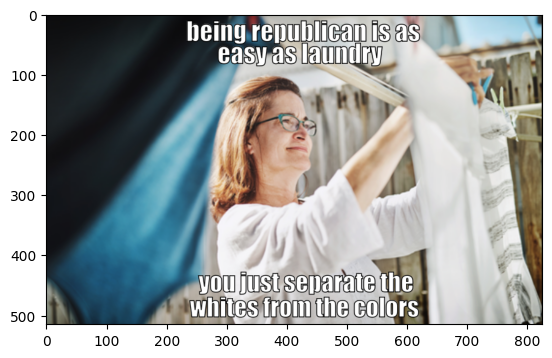

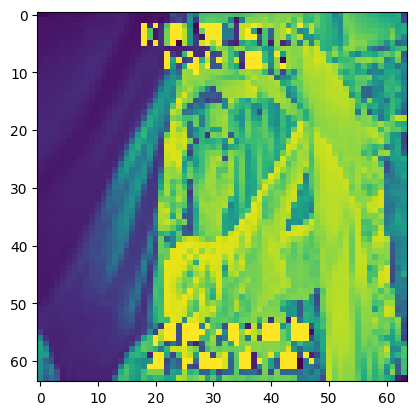

In [ ]:
img,lb=next(iter(train_dataset))
images,label=next(iter(train_dataset_preprocessed))

plt.imshow(img)
plt.show()

plt.imshow(images[0])
plt.show()

##Create DataLoaders

In [ ]:
BATCH_SIZE=128

train_loader=DataLoader(dataset=train_dataset_preprocessed, batch_size=BATCH_SIZE, shuffle=True)
val_loader=DataLoader(dataset=val_dataset_preprocessed, batch_size=BATCH_SIZE, shuffle=True)
test_loader=DataLoader(dataset=test_dataset_preprocessed, batch_size=BATCH_SIZE, shuffle=True)

loaders = {
    'train' : torch.utils.data.DataLoader(dataset=train_dataset_preprocessed,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          ),

    'validation' : torch.utils.data.DataLoader(val_dataset_preprocessed,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          ),

    'test'  : torch.utils.data.DataLoader(test_dataset_preprocessed,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          ),
}


print("Number of batches in training set: ", len(loaders['train']))
print("Number of batches in validation set: ", len(loaders['validation']))
print("Number of batches in test set: ", len(loaders['test']))

Number of batches in training set:  27
Number of batches in validation set:  4
Number of batches in test set:  8


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


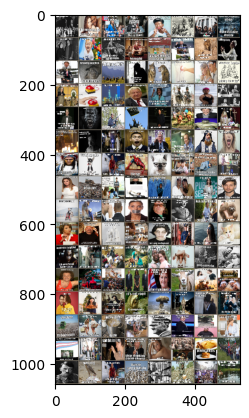

In [ ]:
import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
# Get a batch of training data
inputs, classes = next(iter(train_loader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out)


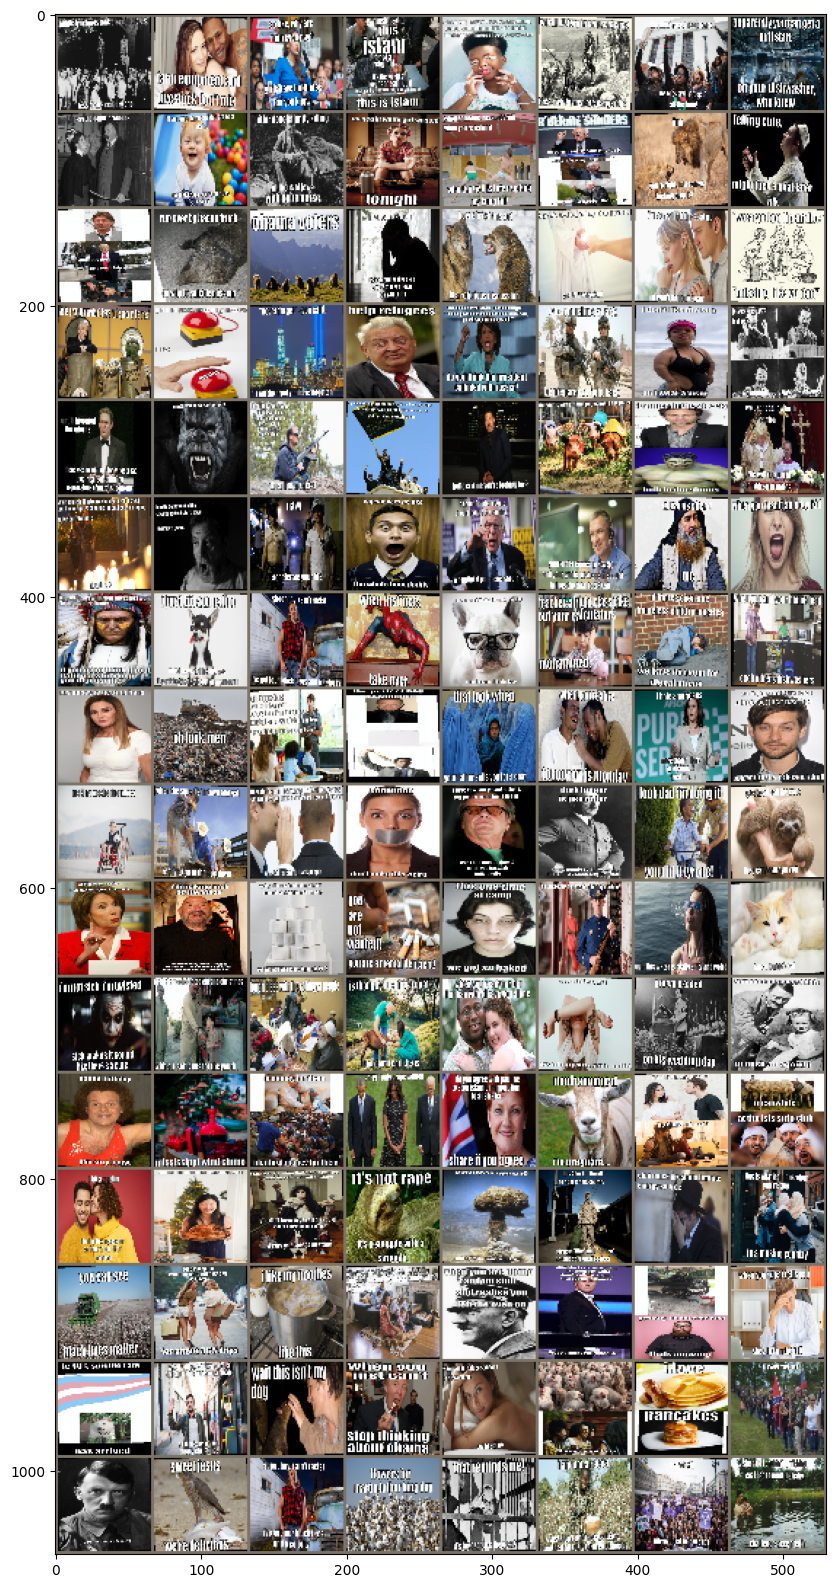

In [ ]:
plt.figure(figsize = (40,20))
imshow(out)

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# # Hyperparameters
# in_channel = 3
# num_classes = 2
# learning_rate = 3e-4
# num_epochs = 10

cuda


#VGG 16

In [ ]:
from torchvision import models, transforms

# load pretrained vgg16 from PyTorch as an instance
# need to make setting 'internet' to 'On'.
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

# Replace output layer for 2 class classifier, 'HATEFUL' and 'NOT HATEFUL'.
net.classifier[6] = nn.Linear(in_features=4096, out_features=2)

net.train()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 214MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# setting of loss function
criterion = nn.CrossEntropyLoss()

# setting fine tuned parameters

params_to_update_1 = []
params_to_update_2 = []
params_to_update_3 = []

# Not only output layer, "features" layers and other classifier layers are tuned.
update_param_names_1 = ["features"]
update_param_names_2 = ["classifier.0.weight",
                        "classifier.0.bias", "classifier.3.weight", "classifier.3.bias"]
update_param_names_3 = ["classifier.6.weight", "classifier.6.bias"]

# store parameters in list
for name, param in net.named_parameters():
    if update_param_names_1[0] in name:
        param.requires_grad = True
        params_to_update_1.append(param)
        #print("params_to_update_1:", name)

    elif name in update_param_names_2:
        param.requires_grad = True
        params_to_update_2.append(param)
        #print("params_to_update_2:", name)

    elif name in update_param_names_3:
        param.requires_grad = True
        params_to_update_3.append(param)
        #print("params_to_update_3:", name)

    else:
        param.requires_grad = False
        #print("no learning", name)

# print("-----------")
# print(params_to_update_1)

# Learning Rates
optimizer = optim.SGD([
    {'params': params_to_update_1, 'lr': 1e-4},
    {'params': params_to_update_2, 'lr': 5e-4},
    {'params': params_to_update_3, 'lr': 1e-3}
], momentum=0.9)

In [ ]:
dataloaders_dict = {"train": train_loader, "val": val_loader}

In [ ]:
# training function
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):

    accuracy_list = []
    loss_list = []

    train_accuracy_list = []
    train_loss_list = []

    # Precondition : Accelerator GPU -> 'On'
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("using device：", device)

    # put betwork into GPU
    net.to(device)
    torch.backends.cudnn.benchmark = True

    # epoch loop
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')

        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # set network 'train' mode
            else:
                net.eval()   # set network 'val' mode

            epoch_loss = 0.0
            epoch_corrects = 0

            # Before training
            if (epoch == 0) and (phase == 'train'):
                continue


            # batch loop
            for inputs, labels in tqdm(dataloaders_dict[phase]):

                # send data to GPU
                inputs = inputs.to(device)
                labels = labels.to(device)

                # initialize optimizer
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)

                    loss = criterion(outputs, labels)  #calcurate loss
                    _, preds = torch.max(outputs, 1)  # predict

                    # back propagtion
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # update loss summation
                    epoch_loss += loss.item() * inputs.size(0)
                    # update correct prediction summation
                    epoch_corrects += torch.sum(preds == labels.data)

            # loss and accuracy for each epoch loop
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / len(dataloaders_dict[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val':
                accuracy_list.append(epoch_acc.item())
                loss_list.append(epoch_loss)

            if phase == 'train':
                train_accuracy_list.append(epoch_acc.item())
                train_loss_list.append(epoch_loss)

    return accuracy_list, loss_list , train_accuracy_list, train_loss_list


##Train

In [ ]:
# start training
num_epochs=10
val_accuracy_list, val_loss_list , train_accuracy_list, train_loss_list = train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)


using device： cuda:0
Epoch 1/10
-------------


  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|██████████| 4/4 [04:14<00:00, 63.59s/it]


val Loss: 0.7500 Acc: 0.5080
Epoch 2/10
-------------


100%|██████████| 27/27 [25:19<00:00, 56.26s/it]


train Loss: 0.7910 Acc: 0.5740


100%|██████████| 4/4 [00:16<00:00,  4.19s/it]


val Loss: 0.8898 Acc: 0.5020
Epoch 3/10
-------------


100%|██████████| 27/27 [01:57<00:00,  4.33s/it]


train Loss: 0.7195 Acc: 0.6065


100%|██████████| 4/4 [00:17<00:00,  4.35s/it]


val Loss: 0.7414 Acc: 0.4980
Epoch 4/10
-------------


100%|██████████| 27/27 [01:57<00:00,  4.34s/it]


train Loss: 0.6728 Acc: 0.6148


100%|██████████| 4/4 [00:17<00:00,  4.43s/it]


val Loss: 0.7555 Acc: 0.4880
Epoch 5/10
-------------


100%|██████████| 27/27 [01:56<00:00,  4.32s/it]


train Loss: 0.6590 Acc: 0.6251


100%|██████████| 4/4 [00:17<00:00,  4.28s/it]


val Loss: 0.7407 Acc: 0.4880
Epoch 6/10
-------------


100%|██████████| 27/27 [01:57<00:00,  4.35s/it]


train Loss: 0.6307 Acc: 0.6517


100%|██████████| 4/4 [00:16<00:00,  4.19s/it]


val Loss: 0.7432 Acc: 0.4860
Epoch 7/10
-------------


100%|██████████| 27/27 [01:57<00:00,  4.36s/it]


train Loss: 0.6235 Acc: 0.6452


100%|██████████| 4/4 [00:16<00:00,  4.16s/it]


val Loss: 0.7514 Acc: 0.5000
Epoch 8/10
-------------


100%|██████████| 27/27 [01:57<00:00,  4.36s/it]


train Loss: 0.6193 Acc: 0.6567


100%|██████████| 4/4 [00:16<00:00,  4.20s/it]


val Loss: 0.7458 Acc: 0.4860
Epoch 9/10
-------------


100%|██████████| 27/27 [01:58<00:00,  4.38s/it]


train Loss: 0.6120 Acc: 0.6623


100%|██████████| 4/4 [00:16<00:00,  4.20s/it]


val Loss: 0.7823 Acc: 0.4980
Epoch 10/10
-------------


100%|██████████| 27/27 [02:04<00:00,  4.61s/it]


train Loss: 0.6139 Acc: 0.6656


100%|██████████| 4/4 [00:22<00:00,  5.51s/it]

val Loss: 0.7660 Acc: 0.4900


In [ ]:
# To save trained model

PATH = '/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/VGG16.pth'
torch.save(net.state_dict(), PATH)


In [ ]:
train_accuracy_list.append(0.6234567897875645)
train_loss_list.append(0.5943567877656777)

In [ ]:
print(val_accuracy_list)
print(val_loss_list)
print(train_accuracy_list)
print(train_loss_list)


[0.508, 0.502, 0.498, 0.488, 0.488, 0.486, 0.5, 0.486, 0.498, 0.49]
[0.7500172276496887, 0.8898286380767823, 0.7414259672164917, 0.7554667463302612, 0.7406886172294617, 0.743186448097229, 0.7513749685287475, 0.7457757096290588, 0.7823497066497803, 0.7660270318984985]
[0.5740029542097489, 0.6064992614475627, 0.6147710487444608, 0.6251107828655834, 0.6516986706056129, 0.6451994091580502, 0.6567208271787296, 0.6623338257016248, 0.6655834564254062, 0.6234567897875645]
[0.7910404203033166, 0.7195208292063794, 0.6727946312776169, 0.6589950839913226, 0.6306532815076752, 0.6235078425139761, 0.6193086799173623, 0.6120402117071335, 0.6138586235715509, 0.5943567877656777]


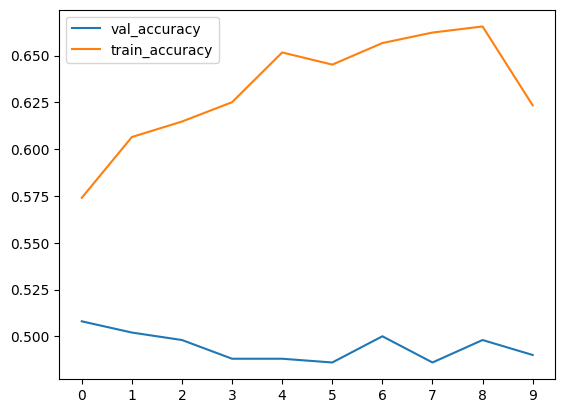

In [ ]:
# val_accuracy_list, val_loss_list , train_accuracy_list, train_loss_list

epoch_num = list(range(10))
fig, ax = plt.subplots(facecolor="w")
ax.plot(epoch_num, val_accuracy_list, label="val_accuracy")
ax.plot(epoch_num, train_accuracy_list, label="train_accuracy")
plt.xticks(epoch_num)

ax.legend()

plt.show()

The training accuracy reached a peak of 0.65, while validation accuracy was low at 0.50. Since the train accuracy is higher than validation accuracy, hence there must be over-fitting.

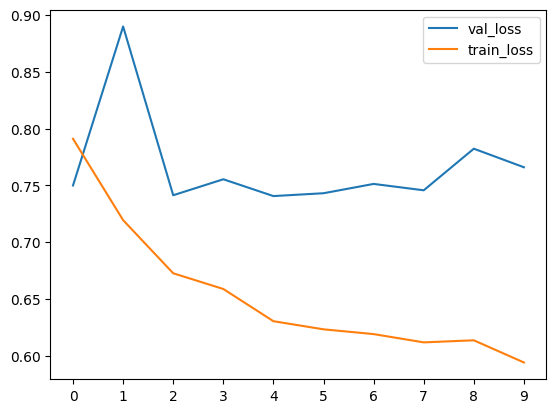

In [ ]:
epoch_num = list(range(10))
fig, ax = plt.subplots(facecolor="w")
ax.plot(epoch_num, val_loss_list, label="val_loss")
ax.plot(epoch_num, train_loss_list, label="train_loss")
plt.xticks(epoch_num)

ax.legend()

plt.show()

Since the validation loss is higher than train loss, hence it clearly explains the over-fitting issue.

In [ ]:
torch.save(net.state_dict(), '/content/VGG16.pth')

#Load state dict:

In [ ]:
from torchvision import models, transforms

# load pretrained vgg16 from PyTorch as an instance
# need to make setting 'internet' to 'On'.
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

# Replace output layer for 2 class classifier, 'HATEFUL' and 'NOT HATEFUL'.
net.classifier[6] = nn.Linear(in_features=4096, out_features=2)

PATH = '/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/VGG16_.pth'
net.load_state_dict(torch.load(PATH))
net.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 235MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def training_accuracy(outputs,label):
  _,out = torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(out == label).clone().detach()).item()/len(out)

def test_accuracy(model, test_data):
    acc=0
    for i, (images, labels) in enumerate(tqdm(test_data)):
          # Precondition : Accelerator GPU -> 'On'
          device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
          print("using device：", device)

          # put betwork into GPU
          model.to(device)
          torch.backends.cudnn.benchmark = True

          # send data to GPU
          images = images.to(device)
          labels = labels.to(device)

          model.eval()
          pred = model(images)
          acc+=training_accuracy(pred,labels)
    return acc/i



In [ ]:
#print Test Accuracy on this cofiguration:
print("TEST Accuracy: ",test_accuracy(net, loaders['test']))

  0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-45-78d72427c62e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(torch.sum(out == label).clone().detach()).item()/len(out)
 12%|█▎        | 1/8 [00:04<00:31,  4.48s/it]

using device： cuda:0


 25%|██▌       | 2/8 [00:08<00:24,  4.11s/it]

using device： cuda:0


 38%|███▊      | 3/8 [00:12<00:21,  4.33s/it]

using device： cuda:0


 50%|█████     | 4/8 [00:17<00:17,  4.31s/it]

using device： cuda:0


 62%|██████▎   | 5/8 [00:22<00:13,  4.52s/it]

using device： cuda:0


 75%|███████▌  | 6/8 [00:27<00:09,  4.78s/it]

using device： cuda:0


 88%|████████▊ | 7/8 [00:31<00:04,  4.51s/it]

using device： cuda:0


100%|██████████| 8/8 [00:34<00:00,  4.32s/it]

using device： cuda:0
TEST Accuracy:  0.5842743347338936


In [ ]:
def output_label(label):
    output_mapping = {
                 0: "Not Hateful",
                 1: "Hateful",
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

##Predictions

In [ ]:
# Precondition : Accelerator GPU -> 'On'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("using device：", device)

# put betwork into GPU
net.to(device)
torch.backends.cudnn.benchmark = True

from torch.autograd import Variable

predictions_list = []
labels_list = []

class_correct = [0. for _ in range(2)]
total_correct = [0. for _ in range(2)]

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)

        test = Variable(images)
        outputs = net(test)
        predicted = torch.max(outputs, 1)[1]
        predictions_list.append(predicted)

        c = (predicted == labels).squeeze()


        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1

print('\n')
for i in range(2):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

using device： cuda:0


100%|██████████| 8/8 [05:16<00:00, 39.58s/it]



Accuracy of Not Hateful: 77.78%
Accuracy of Hateful: 28.57%


##Printing the Confusion Matrix

In [ ]:
from itertools import chain

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

confusion_matrix(labels_l, predictions_l)
print("Classification report for V :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for V :
              precision    recall  f1-score   support

           0       0.51      0.90      0.65       508
           1       0.51      0.11      0.18       490

    accuracy                           0.51       998
   macro avg       0.51      0.50      0.42       998
weighted avg       0.51      0.51      0.42       998




 **Accuracy:** **0.51**


 **Classwise** precision, recall & f1-score are dislayed above.

##tSNE Plot

In [ ]:
test_data_refined

test_hate_50= test_data_refined.loc[test_data_refined['label'] == 1]
test_hate_50.reset_index(inplace=True)
test_hate_50=test_hate_50[:50]
print (len(test_hate_50))
# test_hate_50.drop(['index'], inplace=True)
test_hate_50.drop(['index'], axis=1, inplace=True)

test_hate_50.head()

50


,img,label
0,16395.png,1
1,37405.png,1
2,94180.png,1
3,54321.png,1
4,97015.png,1


In [ ]:
test_nonhate_50= test_data_refined.loc[test_data_refined['label'] == 0]
test_nonhate_50.reset_index(inplace=True)
test_nonhate_50=test_nonhate_50[:50]
test_nonhate_50.drop(['index'], axis=1, inplace=True)
print (len(test_nonhate_50))
test_nonhate_50.head()

50


,img,label
0,70691.png,0
1,89263.png,0
2,52971.png,0
3,24973.png,0
4,02356.png,0


In [ ]:
test50_hate_dataset = customDataset(
    dataframe=test_hate_50,
    root_dir = "/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img",
    )

test50_non_hate_dataset = customDataset(
    dataframe=test_nonhate_50,
    root_dir = "/content/drive/MyDrive/2 Sem/DL/Assignments/A4_BharatGoyal_DebnathKundu_SaloniAgrawal/Q1/Data/hateful_memes/img",
    )

In [ ]:
test50_hate_dataset = transform_dataset(test50_hate_dataset,transform_function_val_test)
test50_non_hate_dataset = transform_dataset(test50_non_hate_dataset,transform_function_val_test)

In [ ]:
BATCH_SIZE=128

test50_hate_loader=DataLoader(dataset=test50_hate_dataset, batch_size=BATCH_SIZE, shuffle=True)
test50_nonhate_loader=DataLoader(dataset=test50_non_hate_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [ ]:
#extract the feature of vgg16 models

vgg_features = torch.nn.Sequential(*list(net.children())[:2])
vgg_features

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
test50_hate_loader

In [ ]:
print('#extract hate features from vgg16')

device = 'cpu'
for images, labels in test50_hate_loader:
    images=images.to(device)
    lables=labels.to(device)
    print(vgg_features(images).cpu().detach().numpy().shape)

    hate_features = vgg_features(images).cpu().detach().numpy().reshape(50, -1)
    hate_labels = labels.cpu().numpy().flatten()

print(hate_features.shape)
print(hate_labels.shape)


print('#extract non-hate features from vgg16')


for (images, labels) in test50_nonhate_loader:
    images=images.to(device)
    lables=labels.to(device)
    print(vgg_features(images).cpu().detach().numpy().shape)

    nonhate_features = vgg_features(images).cpu().detach().numpy().reshape(50, -1)
    nonhate_labels = labels.cpu().numpy().flatten()

print(nonhate_features.shape)
print(nonhate_labels.shape)



#extract hate features from vgg16


/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(50, 512, 7, 7)
(50, 25088)
(50,)
#extract non-hate features from vgg16
(50, 512, 7, 7)
(50, 25088)
(50,)


In [ ]:
np.save('VG16_hateful_features.npy', hate_features)
np.save('VG16_non_hateful_features.npy', nonhate_features)
np.save('VG16_hateful_label.npy',hate_labels)
np.save('VG16_non_hateful_label.npy',nonhate_labels)

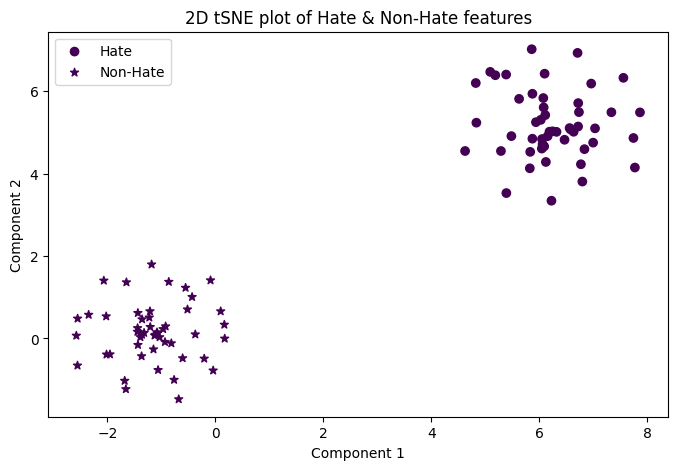

In [ ]:
from sklearn.manifold import TSNE

plt.figure(figsize=(8,5))

hate_embeddings = TSNE(n_components=2).fit_transform(hate_features)
nonhate_embeddings = TSNE(n_components=2).fit_transform(nonhate_features)

# print(len(hate_embeddings))
# print(len(nonhate_embeddings))

plt.scatter(hate_embeddings[:,0], hate_embeddings[:,1], c=hate_labels, marker='o')
plt.scatter(nonhate_embeddings[:,0], nonhate_embeddings[:,1], c=nonhate_labels, marker='*')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.title("2D tSNE plot of Hate & Non-Hate features")
plt.legend(['Hate','Non-Hate'])
plt.show()

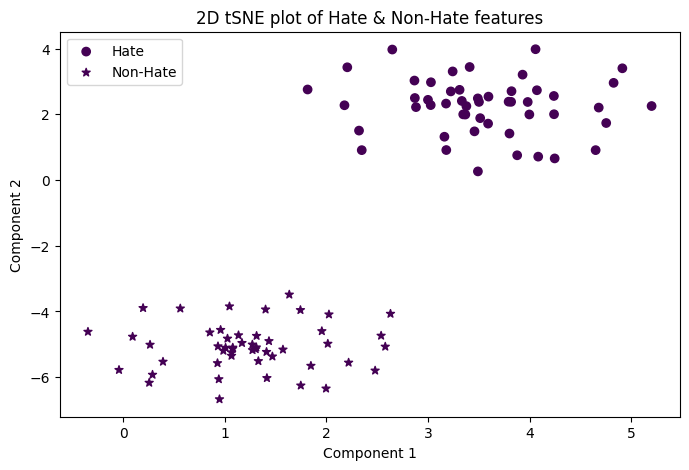

In [ ]:
from sklearn.manifold import TSNE

plt.figure(figsize=(8,5))

hate_embeddings = TSNE(n_components=2).fit_transform(hate_features)
nonhate_embeddings = TSNE(n_components=2).fit_transform(nonhate_features)

# print(len(hate_embeddings))
# print(len(nonhate_embeddings))

plt.scatter(hate_embeddings[:,0], hate_embeddings[:,1], c=hate_labels, marker='o')
plt.scatter(nonhate_embeddings[:,0], nonhate_embeddings[:,1], c=nonhate_labels, marker='*')

plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.title("2D tSNE plot of Hate & Non-Hate features")
plt.legend(['Hate','Non-Hate'])
plt.show()

**The plots shows that the two features are clearly separable.**